In [1]:
options(warn = -1)
options(repr.plot.width=15, repr.plot.height=9) 
Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8")

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

In [2]:

election <- read.csv("./Data/election_2022.csv")
head(election)

tail(election)
str(election)

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
1,서울특별시,종로구,129968,100629,46130,49172,3115
2,서울특별시,중구,111448,84998,38244,42906,2310
3,서울특별시,용산구,199077,152068,60063,85047,4374
4,서울특별시,성동구,252087,197240,84411,103880,5365
5,서울특별시,광진구,303582,235471,109922,113733,7072
6,서울특별시,동대문구,300928,232106,108171,112890,6416


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
243,경상남도,함양군,34459,26955,8526,16957,528
244,경상남도,산청군,31645,24913,7125,16607,464
245,경상남도,거창군,53049,41399,11963,27254,895
246,경상남도,합천군,39768,31270,6911,22742,511
247,제주특별자치도,제주시,408552,296826,157695,122084,10007
248,제주특별자치도,서귀포시,155802,112823,55435,50930,3591


'data.frame':	248 obs. of  7 variables:
 $ 광역시도: chr  "서울특별시" "서울특별시" "서울특별시" "서울특별시" ...
 $ 시군구  : chr  "종로구" "중구" "용산구" "성동구" ...
 $ 선거인수: int  129968 111448 199077 252087 303582 300928 347108 375880 268974 281812 ...
 $ 투표수  : int  100629 84998 152068 197240 235471 232106 260862 292187 199448 216036 ...
 $ 이재명  : int  46130 38244 60063 84411 109922 108171 130381 142702 103333 106546 ...
 $ 윤석열  : int  49172 42906 85047 103880 113733 112890 118201 135044 86540 99780 ...
 $ 심상정  : int  3115 2310 4374 5365 7072 6416 6899 8952 5245 5605 ...


In [3]:
length(unique(election$`시군구`))


[1] 226

In [4]:
# 3명만 투표한사람이 몇명인가를 나타내는 컬럼추가
head(election)
# 컬럼을 추가한다             선거 데이터에 5,6,7  row의 더한 값을
election$electionsum <- apply(election[,5:7],1,sum)

head(election)


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
1,서울특별시,종로구,129968,100629,46130,49172,3115
2,서울특별시,중구,111448,84998,38244,42906,2310
3,서울특별시,용산구,199077,152068,60063,85047,4374
4,서울특별시,성동구,252087,197240,84411,103880,5365
5,서울특별시,광진구,303582,235471,109922,113733,7072
6,서울특별시,동대문구,300928,232106,108171,112890,6416


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionsum
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,서울특별시,종로구,129968,100629,46130,49172,3115,98417
2,서울특별시,중구,111448,84998,38244,42906,2310,83460
3,서울특별시,용산구,199077,152068,60063,85047,4374,149484
4,서울특별시,성동구,252087,197240,84411,103880,5365,193656
5,서울특별시,광진구,303582,235471,109922,113733,7072,230727
6,서울특별시,동대문구,300928,232106,108171,112890,6416,227477


In [5]:
# electionsum 에 투표수의 몇 퍼센트인지?
# electionratio 컬럼 만들기
election$electionratio <-  election$electionsum / election[,4] * 100
head(election)


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionsum,electionratio
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80183
2,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19055
3,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30076
4,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18292
5,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.98531
6,서울특별시,동대문구,300928,232106,108171,112890,6416,227477,98.00565


In [6]:
# electionratio가 가장 높은 시군구와 가장 낮은 시군구?

# 어레인지 를 사용하기 위한 라이브러리
 #install.packages("dplyr")
            
subset(election, electionratio == max(election$electionratio))
subset(election, electionratio == min(election$electionratio))



,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionsum,electionratio
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
82,경기도,성남시분당구,404493,335434,140966,183094,7005,331065,98.69751


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionsum,electionratio
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
59,인천광역시,옹진군,18659,14912,5218,8797,304,14319,96.02334


In [7]:
# csv 로 저장하기 : filename -> election_2022_job.csv

write.csv(election,"./Data/election_2022_job.csv", row.names = F)
tail(election)
library("dplyr")

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionsum,electionratio
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
243,경상남도,함양군,34459,26955,8526,16957,528,26011,96.49787
244,경상남도,산청군,31645,24913,7125,16607,464,24196,97.12198
245,경상남도,거창군,53049,41399,11963,27254,895,40112,96.89123
246,경상남도,합천군,39768,31270,6911,22742,511,30164,96.46306
247,제주특별자치도,제주시,408552,296826,157695,122084,10007,289786,97.62824
248,제주특별자치도,서귀포시,155802,112823,55435,50930,3591,109956,97.45885



다음의 패키지를 부착합니다: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# 광역시도별 투표율을 3D piechart로 표현하기


In [8]:
#election$`광역시도`
table(election$`광역시도`)
sum(table(election$`광역시도`))
# 광역시도에 해당하는 table(광역시도 투표수) /  sum(table(election$`광역시도`))
unique(election$`광역시도`)

table(election$`광역시도`)[1]

#regionInjury.mean <- arrange(aggregate(부상자수 ~ 자치구명,seoul, mean),desc(부상자수)) 

unique(table(election$`광역시도`))

length(table(election$`광역시도`))

     # election$`광역시도`
 
#paste(table(election$`광역시도`),sum(table(election$`광역시도`)))

      #table(election$`광역시도`) / sum(table(election$`광역시도`)) * 100

      #apply(election[,4],2,sum) 
                 # / sum(election[,4]) 
      


        강원도         경기도       경상남도       경상북도     광주광역시 
            18             41             22             24              5 
    대구광역시     대전광역시     부산광역시     서울특별시 세종특별자치시 
             8              5             16             25              1 
    울산광역시     인천광역시       전라남도       전라북도 제주특별자치도 
             5             10             22             15              2 
      충청남도       충청북도 
            16             13 

[1] 248

[1] "서울특별시"     "부산광역시"     "대구광역시"     "인천광역시"    
 [5] "광주광역시"     "대전광역시"     "울산광역시"     "세종특별자치시"
 [9] "경기도"         "강원도"         "충청북도"       "충청남도"      
[13] "전라북도"       "전라남도"       "경상북도"       "경상남도"      
[17] "제주특별자치도"

강원도 
    18

[1] 18 41 22 24  5  8 16 25  1 10 15  2 13

[1] 17

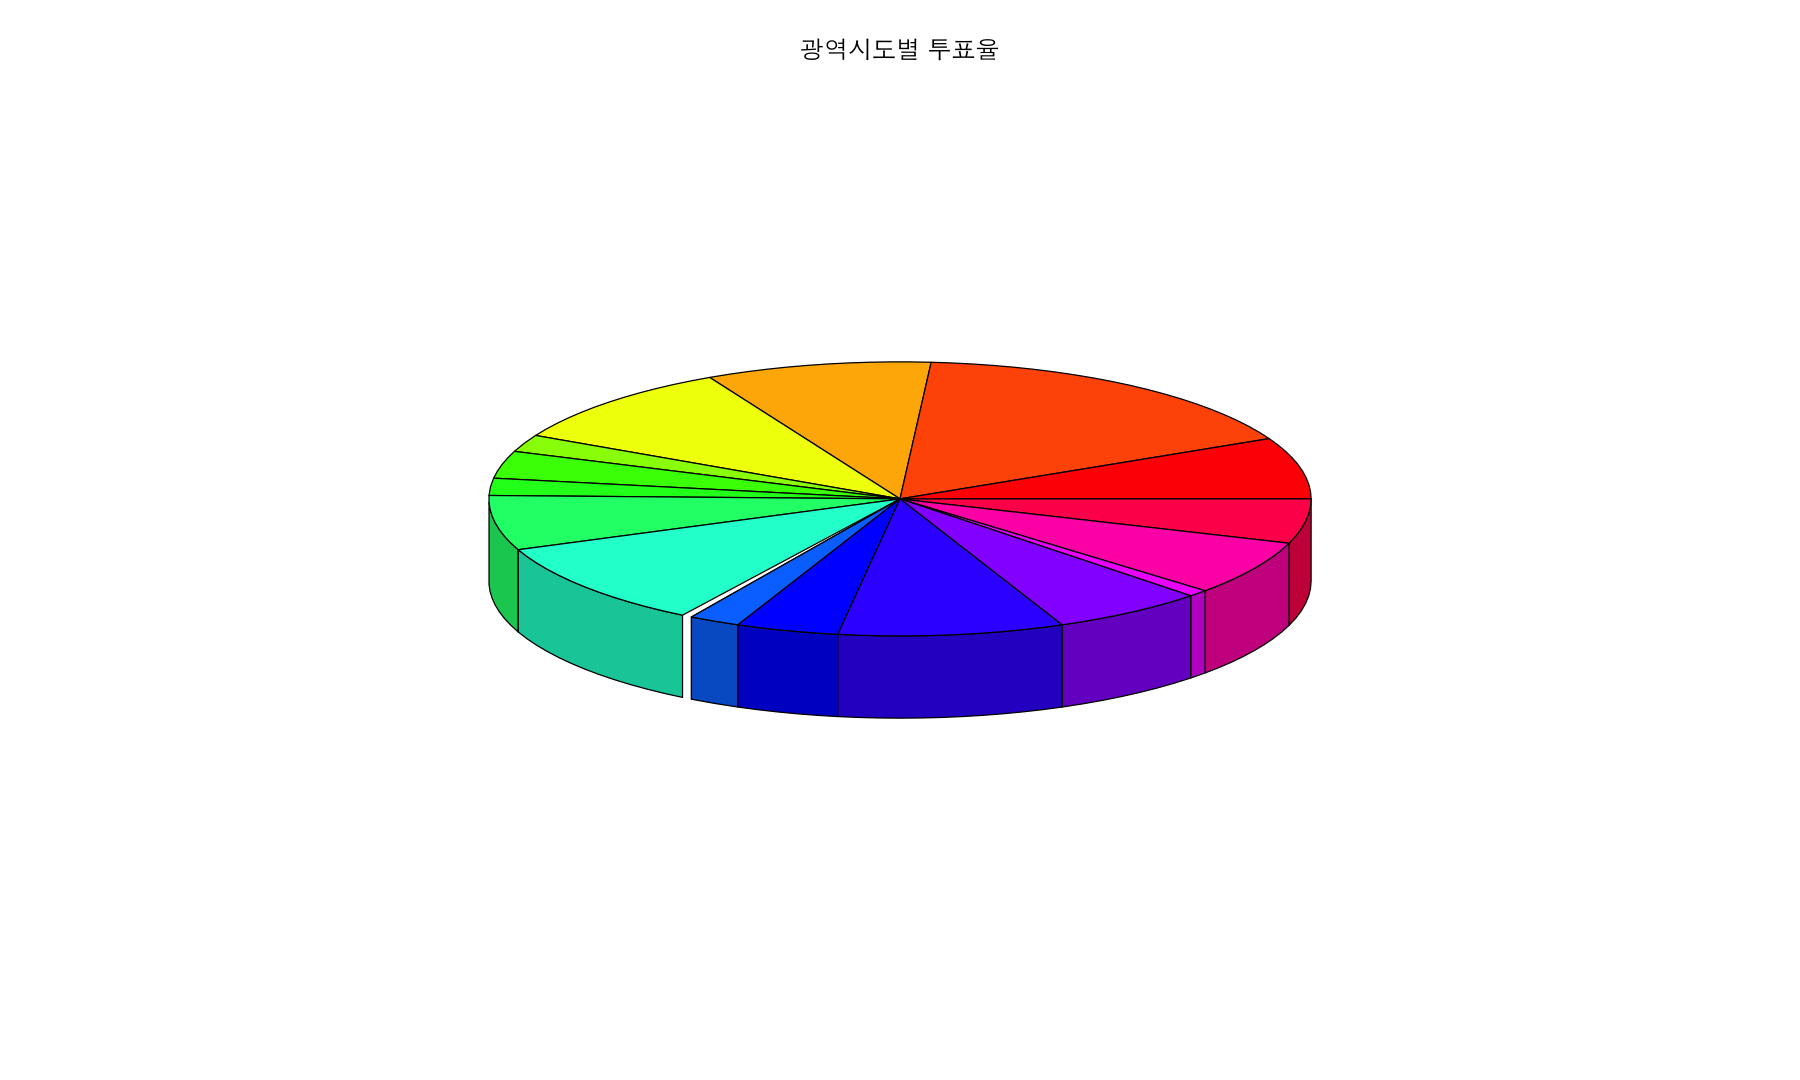

In [9]:
library(plotrix)
          #  for (i in 1:length(table(election$`광역시도`))) {
           #         table(election$`광역시도`)[i] / sum(table(election$`광역시도`))
            #}
        #  <-  paste(table(election$`광역시도`),sum(table(election$`광역시도`)))

            


par(family = 'AppleGothic',bg= 'white')
pie3D(table(election$`광역시도`), 
            main = '광역시도별 투표율',
       
)

In [10]:
# 광역시별 합계구하기
#                        y    x     data     구하는거
elec_sum <- aggregate(투표수 ~ 광역시도, election, sum)
                    #         광역시도를 그룹화하고 그에 대한 투표수의 합을 나타낸다
elec_sum

광역시도,투표수
<chr>,<int>
강원도,1015458
경기도,8518854
경상남도,2146882
경상북도,1774284
광주광역시,985492
대구광역시,1611512
대전광역시,945308
부산광역시,2200224
서울특별시,6501831


In [11]:
# 합계를 내림차순으로 정렬하기 
elec_sum_order <- arrange(elec_sum, desc(투표수))
elec_sum_order

광역시도,투표수
<chr>,<int>
경기도,8518854
서울특별시,6501831
부산광역시,2200224
경상남도,2146882
인천광역시,1883504
경상북도,1774284
대구광역시,1611512
충청남도,1324660
전라남도,1282168


In [12]:
# ratio 구하기
e_ratio <-  round(elec_sum_order$'투표수' / sum(elec_sum_order$'투표수') * 100,2)
e_ratio

[1] 25.23 19.26  6.52  6.36  5.58  5.25  4.77  3.92  3.80  3.66  3.01  2.92
[13]  2.85  2.80  2.18  1.21  0.69

In [13]:
# label 만들기
label <- paste(elec_sum_order$'광역시도',"\n", e_ratio,"%")


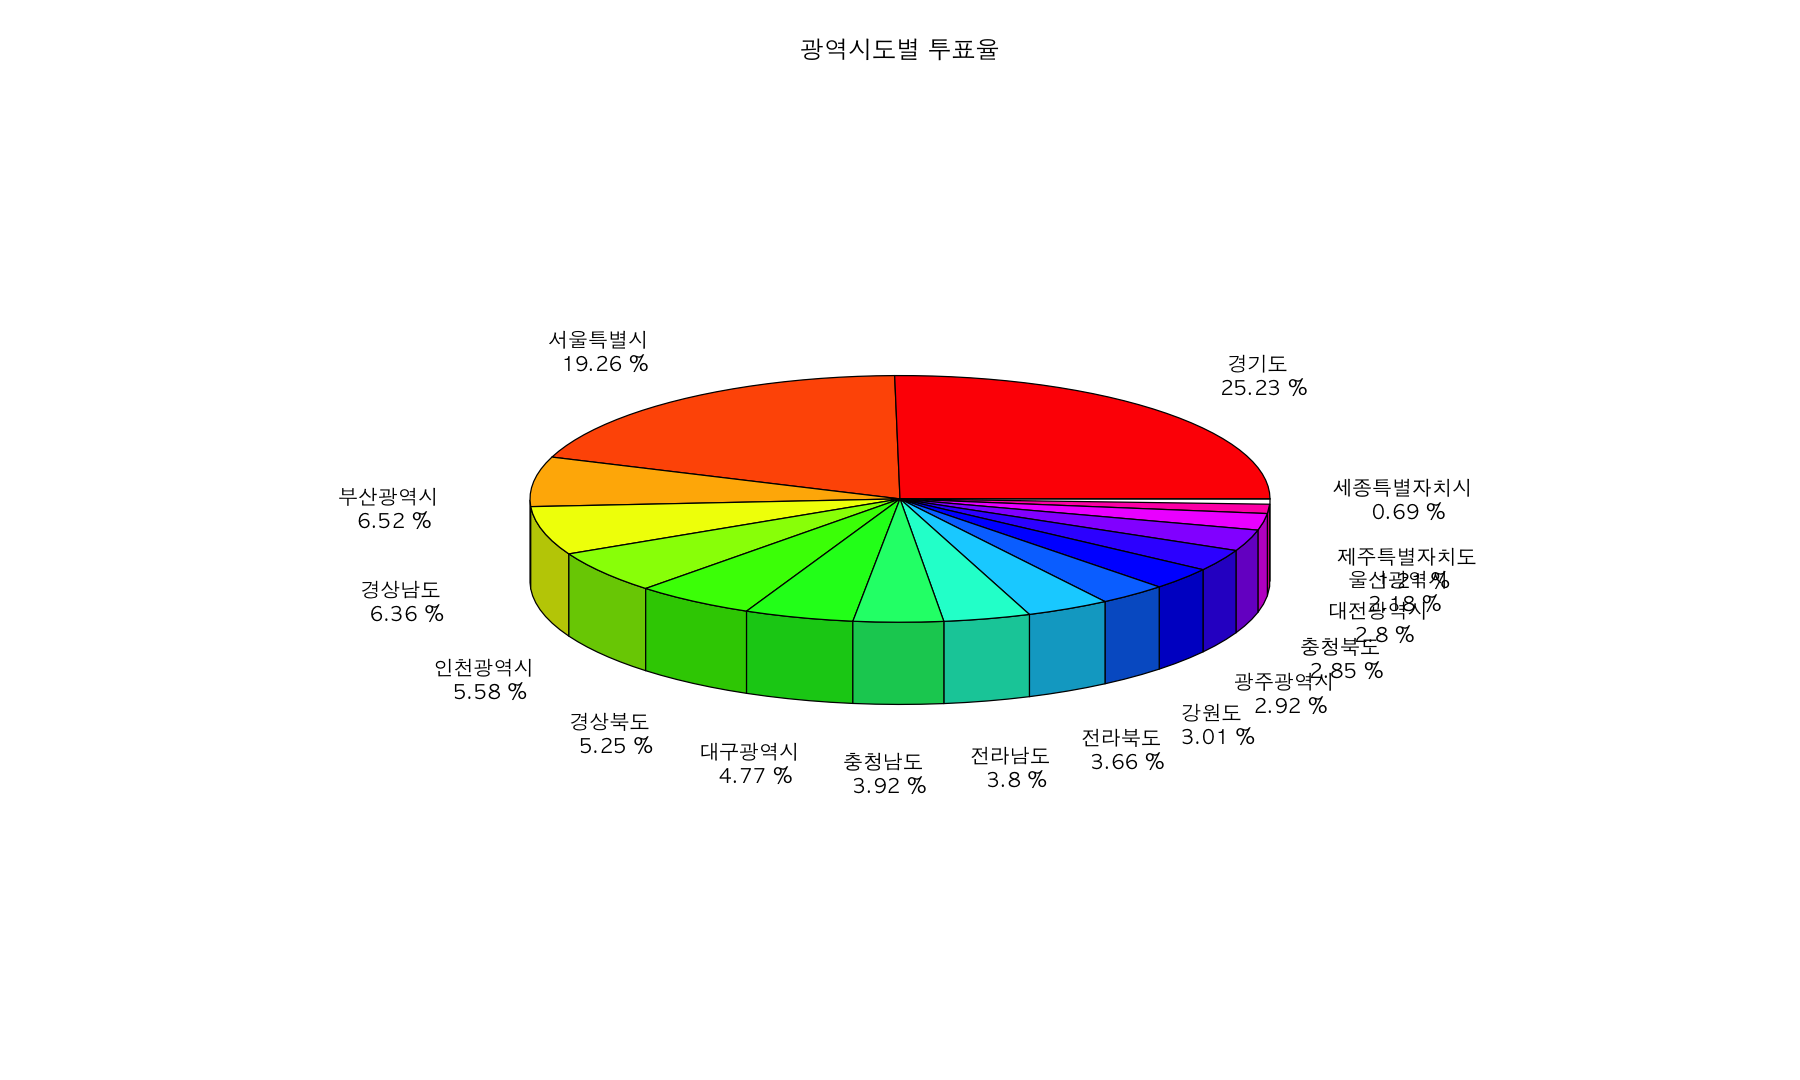

In [14]:
# 파이 차트는 비율을 보기위해 사용한다
par(family = 'AppleGothic',bg= 'white')
pie3D(elec_sum_order$'투표수', 
            # 타이틀 지정
            main = '광역시도별 투표율',
            # 라벨 지정
            labels = label,
            # 라벨 크기 조절
            labelcex = 1,
            # 크기조절                                                                    
            radius = 0.9,
           


)

In [15]:
# 수도권 의 투표수에 대한 전체 투표수의 퍼센트?
    

In [16]:
# 윤석열 후보의  광역시도별 투표율

    head(election)

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionsum,electionratio
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80183
2,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19055
3,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30076
4,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18292
5,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.98531
6,서울특별시,동대문구,300928,232106,108171,112890,6416,227477,98.00565


In [17]:
#    연산을 시행하는 값  그룹화 할 값 data  연산
yoon <-  aggregate(윤석열 ~ 광역시도, election, sum)

yoon

광역시도,윤석열
<chr>,<int>
강원도,544980
경기도,3859666
경상남도,1237346
경상북도,1278922
광주광역시,124511
대구광역시,1199888
대전광역시,464060
부산광역시,1270072
서울특별시,3255747


In [18]:
yoondata <- arrange(yoon, desc(윤석열))
yoondata

광역시도,윤석열
<chr>,<int>
경기도,3859666
서울특별시,3255747
경상북도,1278922
부산광역시,1270072
경상남도,1237346
대구광역시,1199888
인천광역시,878560
충청남도,670283
강원도,544980


In [19]:

         ratio <- round(yoondata$`윤석열` / sum(yoondata$`윤석열`) * 100,1)
ratio

Rdata <-  ifelse(ratio < 3, yoondata$`광역시도`,paste(yoondata$`광역시도`,"\n",ratio,'%'))
Rdata

[1] 23.7 20.0  7.9  7.8  7.6  7.4  5.4  4.1  3.4  3.0  2.9  2.4  1.1  1.1  0.9
[16]  0.8  0.6

[1] "경기도 \n 23.7 %"    "서울특별시 \n 20 %"  "경상북도 \n 7.9 %"  
 [4] "부산광역시 \n 7.8 %" "경상남도 \n 7.6 %"   "대구광역시 \n 7.4 %"
 [7] "인천광역시 \n 5.4 %" "충청남도 \n 4.1 %"   "강원도 \n 3.4 %"    
[10] "충청북도 \n 3 %"     "대전광역시"          "울산광역시"         
[13] "전라북도"            "제주특별자치도"      "전라남도"           
[16] "광주광역시"          "세종특별자치시"

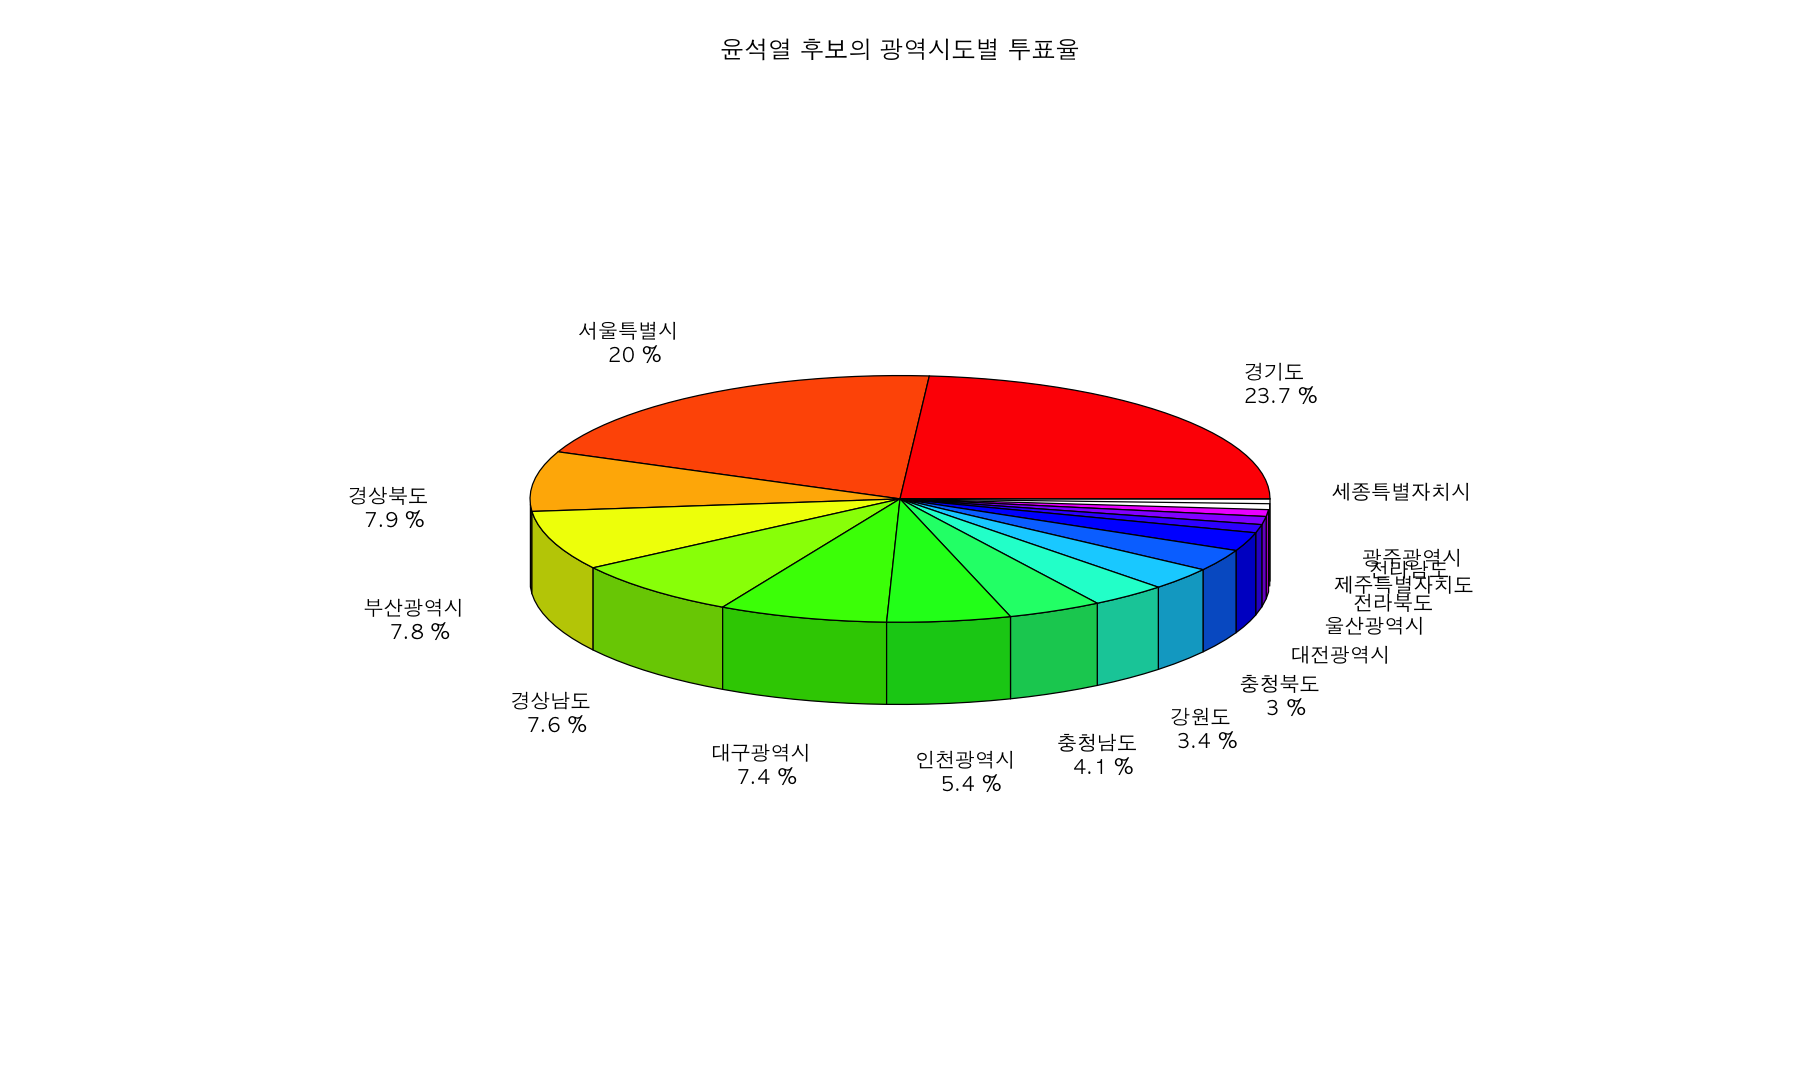

In [20]:
par(family = 'AppleGothic',bg= 'white')
pie3D(yoondata$`윤석열`, 
            main = '윤석열 후보의 광역시도별 투표율', 
            labels = Rdata,
            labelcex = 1,
            radius = 0.9,
           


)

In [21]:
# 이재명 후보도 해보기
lee <-  aggregate(이재명 ~ 광역시도, election, sum)
lee

광역시도,이재명
<chr>,<int>
강원도,419644
경기도,4297931
경상남도,794130
경상북도,418371
광주광역시,830058
대구광역시,345045
대전광역시,434950
부산광역시,831896
서울특별시,2944981


In [22]:
leedata <- arrange(lee, desc(이재명))
leedata

광역시도,이재명
<chr>,<int>
경기도,4297931
서울특별시,2944981
전라남도,1094872
전라북도,1016863
인천광역시,913320
부산광역시,831896
광주광역시,830058
경상남도,794130
충청남도,589991


In [23]:
         Leeratio <- round(leedata$`이재명` / sum(leedata$`이재명`) * 100,1)
Leeratio

LeeRdata <-  ifelse(Leeratio < 3, leedata$`광역시도`,paste(leedata$`광역시도`,"\n",Leeratio,'%'))
LeeRdata

[1] 26.9 18.4  6.8  6.4  5.7  5.2  5.2  5.0  3.7  2.7  2.7  2.6  2.6  2.2  1.9
[16]  1.3  0.7

[1] "경기도 \n 26.9 %"     "서울특별시 \n 18.4 %" "전라남도 \n 6.8 %"   
 [4] "전라북도 \n 6.4 %"    "인천광역시 \n 5.7 %"  "부산광역시 \n 5.2 %" 
 [7] "광주광역시 \n 5.2 %"  "경상남도 \n 5 %"      "충청남도 \n 3.7 %"   
[10] "대전광역시"           "충청북도"             "강원도"              
[13] "경상북도"             "대구광역시"           "울산광역시"          
[16] "제주특별자치도"       "세종특별자치시"

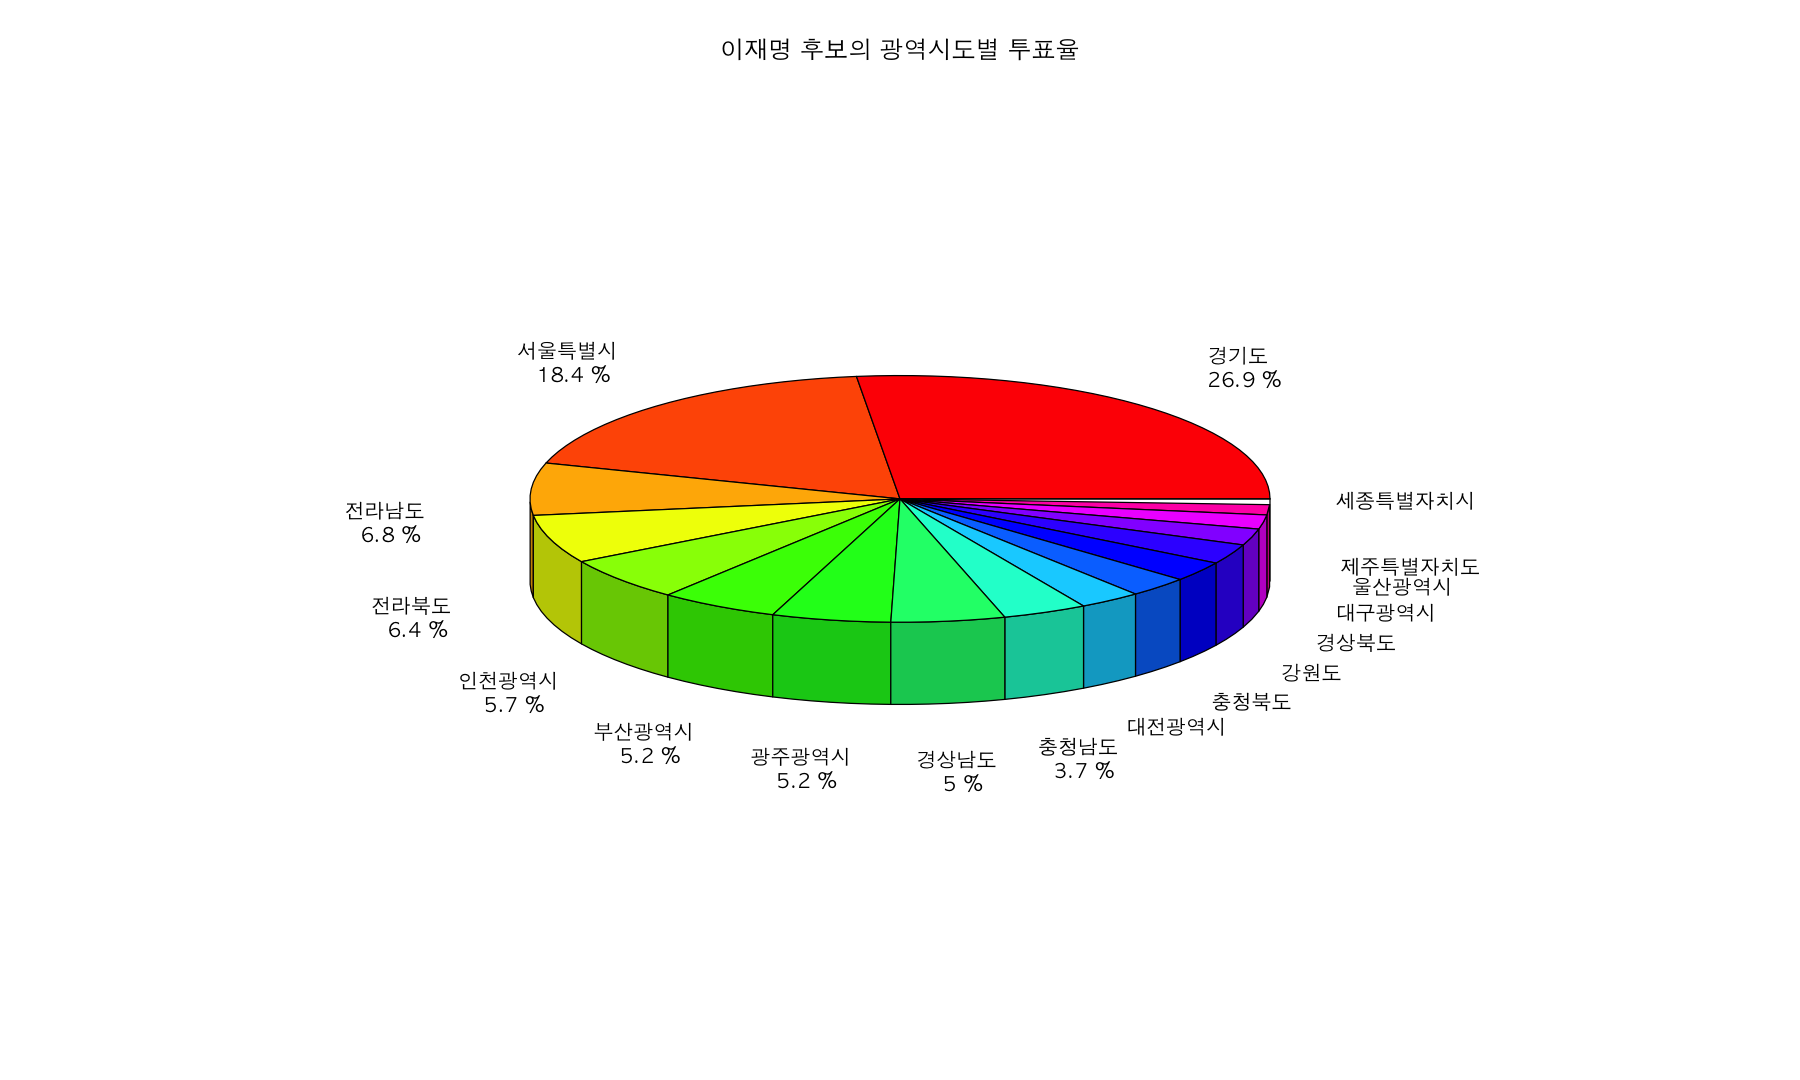

In [24]:
par(family = 'AppleGothic',bg= 'white')
pie3D(leedata$`이재명`, 
            main = '이재명 후보의 광역시도별 투표율', 
            labels = LeeRdata,
            labelcex = 1,
            radius = 0.9,
           


)

In [25]:
# 수도권 득표율 구하기 
leedata

#apply(leedata[],1,sum)

 sudo <-  leedata[c(1,2,5),]
 sudo
apply(leedata[,2],)
 

par(family = 'AppleGothic',bg= 'white')
pie3D(leedata$``, 
            main = '수도권 비수도권 비율', 
            
        
            labelcex = 1,
            radius = 0.9,
           


)


ERROR: Error in parse(text = x, srcfile = src): 길이가 0인 변수명을 사용하려고 시도했습니다


[1] 4297931 2944981 1094872 1016863  913320  831896  830058  794130  589991
[10]  434950  429153  419644  418371  345045  297134  213130  119349

## 윤석열 후보의 서울 득표 탑파이브 만 득표율로 표시하고 나머지 자역은 기타로 합치기

In [ ]:
head(election)

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionsum,electionratio
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80183
2,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19055
3,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30076
4,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18292
5,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.98531
6,서울특별시,동대문구,300928,232106,108171,112890,6416,227477,98.00565


In [ ]:
election[,1]

[1] "서울특별시"     "서울특별시"     "서울특별시"     "서울특별시"    
  [5] "서울특별시"     "서울특별시"     "서울특별시"     "서울특별시"    
  [9] "서울특별시"     "서울특별시"     "서울특별시"     "서울특별시"    
 [13] "서울특별시"     "서울특별시"     "서울특별시"     "서울특별시"    
 [17] "서울특별시"     "서울특별시"     "서울특별시"     "서울특별시"    
 [21] "서울특별시"     "서울특별시"     "서울특별시"     "서울특별시"    
 [25] "서울특별시"     "부산광역시"     "부산광역시"     "부산광역시"    
 [29] "부산광역시"     "부산광역시"     "부산광역시"     "부산광역시"    
 [33] "부산광역시"     "부산광역시"     "부산광역시"     "부산광역시"    
 [37] "부산광역시"     "부산광역시"     "부산광역시"     "부산광역시"    
 [41] "부산광역시"     "대구광역시"     "대구광역시"     "대구광역시"    
 [45] "대구광역시"     "대구광역시"     "대구광역시"     "대구광역시"    
 [49] "대구광역시"     "인천광역시"     "인천광역시"     "인천광역시"    
 [53] "인천광역시"     "인천광역시"     "인천광역시"     "인천광역시"    
 [57] "인천광역시"     "인천광역시"     "인천광역시"     "광주광역시"    
 [61] "광주광역시"     "광주광역시"     "광주광역시"     "광주광역시"    
 [65] "대전광역시"     "대전광역시"     "대전광역시"     "대전광역시"    
 [69] "대전광역시"     "울산광역시"     "울산광역시"     "울산광역시"    
 [73] "울산광역시"     "울산광역시"     "세종특별자치시" "경기도"        
 [77] "경기도"         "경기도"         "경기도"         "경기도"        
 [81] "경기도"         "경기도"         "경기도"         "경기도"        
 [85] "경기도"         "경기도"         "경기도"         "경기도"        
 [89] "경기도"         "경기도"         "경기도"         "경기도"        
 [93] "경기도"         "경기도"         "경기도"         "경기도"        
 [97] "경기도"         "경기도"         "경기도"         "경기도"        
[101] "경기도"         "경기도"         "경기도"         "경기도"        
[105] "경기도"         "경기도"         "경기도"         "경기도"        
[109] "경기도"         "경기도"         "경기도"         "경기도"        
[113] "경기도"         "경기도"         "경기도"         "경기도"        
[117] "강원도"         "강원도"         "강원도"         "강원도"        
[121] "강원도"         "강원도"         "강원도"         "강원도"        
[125] "강원도"         "강원도"         "강원도"         "강원도"        
[129] "강원도"         "강원도"         "강원도"         "강원도"        
[133] "강원도"         "강원도"         "충청북도"       "충청북도"      
[137] "충청북도"       "충청북도"       "충청북도"       "충청북도"      
[141] "충청북도"       "충청북도"       "충청북도"       "충청북도"      
[145] "충청북도"       "충청북도"       "충청북도"       "충청남도"      
[149] "충청남도"       "충청남도"       "충청남도"       "충청남도"      
[153] "충청남도"       "충청남도"       "충청남도"       "충청남도"      
[157] "충청남도"       "충청남도"       "충청남도"       "충청남도"      
[161] "충청남도"       "충청남도"       "충청남도"       "전라북도"      
[165] "전라북도"       "전라북도"       "전라북도"       "전라북도"      
[169] "전라북도"       "전라북도"       "전라북도"       "전라북도"      
[173] "전라북도"       "전라북도"       "전라북도"       "전라북도"      
[177] "전라북도"       "전라북도"       "전라남도"       "전라남도"      
[181] "전라남도"       "전라남도"       "전라남도"       "전라남도"      
[185] "전라남도"       "전라남도"       "전라남도"       "전라남도"      
[189] "전라남도"       "전라남도"       "전라남도"       "전라남도"      
[193] "전라남도"       "전라남도"       "전라남도"       "전라남도"      
[197] "전라남도"       "전라남도"       "전라남도"       "전라남도"      
[201] "경상북도"       "경상북도"       "경상북도"       "경상북도"      
[205] "경상북도"       "경상북도"       "경상북도"       "경상북도"      
[209] "경상북도"       "경상북도"       "경상북도"       "경상북도"      
[213] "경상북도"       "경상북도"       "경상북도"       "경상북도"      
[217] "경상북도"       "경상북도"       "경상북도"       "경상북도"      
[221] "경상북도"       "경상북도"       "경상북도"       "경상북도"      
[225] "경상남도"       "경상남도"       "경상남도"       "경상남도"      
[229] "경상남도"       "경상남도"       "경상남도"       "경상남도"      
[233] "경상남도"       "경상남도"       "경상남도"       "경상남도"      
[237] "경상남도"       "경상남도"       "경상남도"       "경상남도"      
[241] "경상남도"       "경상남도"       "경상남도"       "경상남도"      
[245] "경상남도"       "경상남도"       "제주특별자치도" "제주특별자치도"

In [ ]:
seoul <- subset(election,election[,1] == '서울특별시')
seoul

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionsum,electionratio
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80183
2,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19055
3,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30076
4,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18292
5,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.98531
6,서울특별시,동대문구,300928,232106,108171,112890,6416,227477,98.00565
7,서울특별시,중랑구,347108,260862,130381,118201,6899,255481,97.93722
8,서울특별시,성북구,375880,292187,142702,135044,8952,286698,98.12141
9,서울특별시,강북구,268974,199448,103333,86540,5245,195118,97.82901


In [ ]:
yoonS <- aggregate(윤석열 ~ 시군구, seoul, sum)
yoonS

시군구,윤석열
<chr>,<int>
강남구,235897
강동구,160593
강북구,86540
강서구,181510
관악구,151944
광진구,113733
구로구,127129
금천구,69227
노원구,163340


In [ ]:
yoon3 <- arrange(yoonS, desc(윤석열))
yoon3

sum(yoon3[,2])
length(yoon3$`시군구`)

시군구,윤석열
<chr>,<int>
송파구,255166
강남구,235897
강서구,181510
서초구,179472
노원구,163340
강동구,160593
관악구,151944
양천구,149780
은평구,140666


[1] 3255747

[1] 25

In [ ]:
#yoonSdata <-  head(yoon3,5)
#yoonSdata
#top5sum <-sum(yoonSdata[,2])
#top5sum



ERROR: Error in `[.data.frame`(yoon3, 5:length(yoon3)): 정의하지 않은 열들이 선택되었습니다


In [ ]:
      ratio <- round(top5sum / sum(yoon3[,2]) * 100,2)
        ratio
        100 - ratio
#ifelse(yoon3 == yoonSdata,paste(yoon3,"\n",)
      #ratio2 <- round(yoonSdata$`윤석열` / sum(yoon3$`윤석열`) * 100 ,2)
      #ratio2

      ratio3 <- round(yoon3$`윤석열` / sum(yoon3$`윤석열`) * 100 ,2)
      ratio3

[1] 31.19

[1] 68.81

[1] 7.84 7.25 5.58 5.51 5.02 4.93 4.67 4.60 4.32 4.17 4.15 4.14 3.90 3.82 3.63
[16] 3.49 3.47 3.19 3.06 3.04 2.66 2.61 2.13 1.51 1.32

In [ ]:
gogo <- ifelse(ratio3 < 4.93 ,paste('기타',"\n", 100 - ratio,'%'),paste(yoonSdata,"\n",ratio2,'%'))
gogo

[1] "c(\"송파구\", \"강남구\", \"강서구\", \"서초구\", \"노원구\") \n 7.84 %"
 [2] "c(255166, 235897, 181510, 179472, 163340) \n 7.25 %"                    
 [3] "c(\"송파구\", \"강남구\", \"강서구\", \"서초구\", \"노원구\") \n 5.58 %"
 [4] "c(255166, 235897, 181510, 179472, 163340) \n 5.51 %"                    
 [5] "c(\"송파구\", \"강남구\", \"강서구\", \"서초구\", \"노원구\") \n 5.02 %"
 [6] "c(\"송파구\", \"강남구\", \"강서구\", \"서초구\", \"노원구\") \n 7.84 %"
 [7] "기타 \n 68.81 %"                                                        
 [8] "기타 \n 68.81 %"                                                        
 [9] "기타 \n 68.81 %"                                                        
[10] "기타 \n 68.81 %"                                                        
[11] "기타 \n 68.81 %"                                                        
[12] "기타 \n 68.81 %"                                                        
[13] "기타 \n 68.81 %"                                                        
[14] "기타 \n 68.81 %"                                                        
[15] "기타 \n 68.81 %"                                                        
[16] "기타 \n 68.81 %"                                                        
[17] "기타 \n 68.81 %"                                                        
[18] "기타 \n 68.81 %"                                                        
[19] "기타 \n 68.81 %"                                                        
[20] "기타 \n 68.81 %"                                                        
[21] "기타 \n 68.81 %"                                                        
[22] "기타 \n 68.81 %"                                                        
[23] "기타 \n 68.81 %"                                                        
[24] "기타 \n 68.81 %"                                                        
[25] "기타 \n 68.81 %"

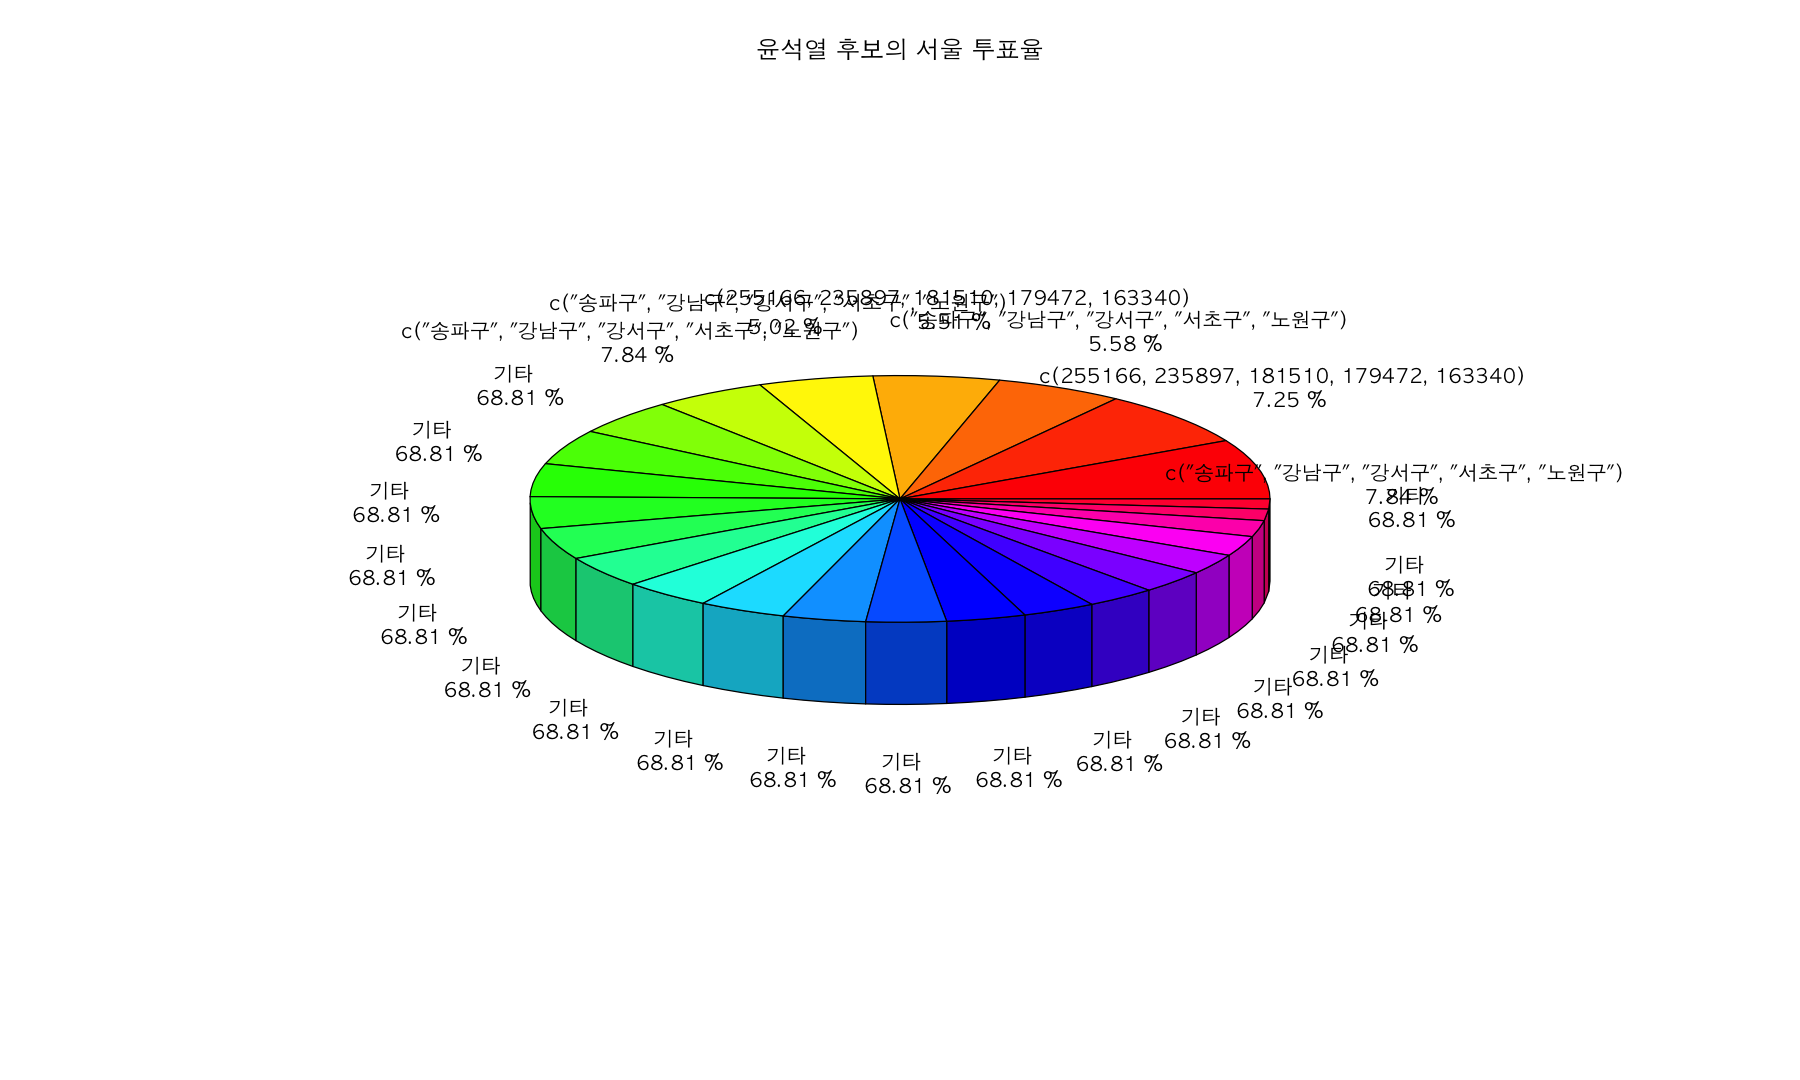

In [ ]:
par(family = 'AppleGothic',bg= 'white')
pie3D(yoon3$`윤석열`, 
            main = '윤석열 후보의 서울 투표율', 
            labels = gogo,
            labelcex = 1,
            radius = 0.9,



)

In [ ]:
# 서울특별시 데이터만 발췌하기
subset(election, 광역시도=='서울특별시')
election_seoul<- election[election$광역시도=="서울특별시",]
election_seoul_윤석열 <- arrange(election_seoul, desc(윤석열))[,c(2,6)]
head(election_seoul_윤석열)

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionsum,electionratio
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80183
2,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19055
3,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30076
4,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18292
5,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.98531
6,서울특별시,동대문구,300928,232106,108171,112890,6416,227477,98.00565
7,서울특별시,중랑구,347108,260862,130381,118201,6899,255481,97.93722
8,서울특별시,성북구,375880,292187,142702,135044,8952,286698,98.12141
9,서울특별시,강북구,268974,199448,103333,86540,5245,195118,97.82901


,시군구,윤석열
,<chr>,<int>
1,송파구,255166
2,강남구,235897
3,강서구,181510
4,서초구,179472
5,노원구,163340
6,강동구,160593


In [ ]:
election_seoul_윤석열_ratio <- round(c(election_seoul_윤석열[1:5,2], sum(election_seoul_윤석열[-c(1:5),2])) /  sum(election_seoul_윤석열$윤석열) * 100,2)
election_seoul_윤석열_ratio

In [ ]:
label <- paste(c(election_seoul_윤석열$시군구[1:5], '기타'), "\n",election_seoul_윤석열_ratio,'%')
label

[1] "송파구 \n 7.84 %" "강남구 \n 7.25 %" "강서구 \n 5.58 %" "서초구 \n 5.51 %"
[5] "노원구 \n 5.02 %" "기타 \n 68.81 %"

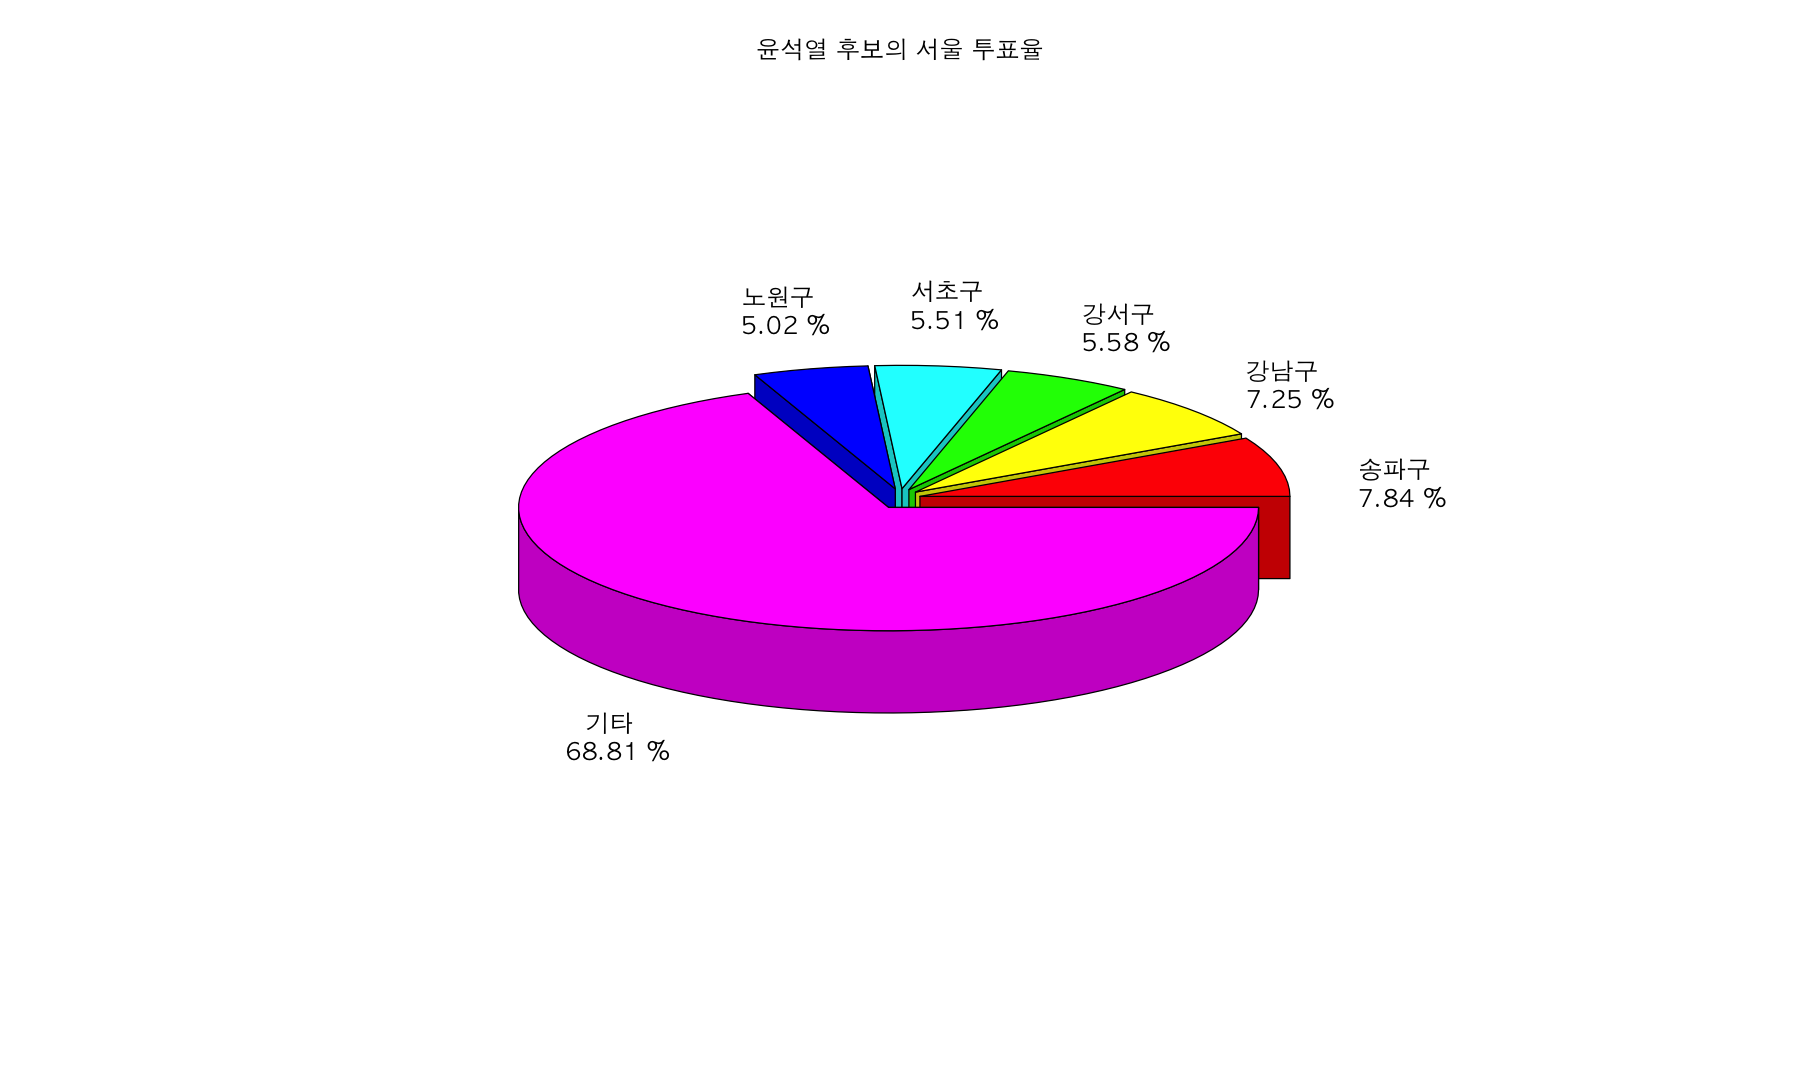

In [ ]:
par(family = 'AppleGothic',bg= 'white')
pie3D(election_seoul_윤석열_ratio, 
            main = '윤석열 후보의 서울 투표율', 
            labels = label,
            labelcex = 1.2,
            radius = 0.9,
            explode = 0.05



)

## 대선주자 출생지별 득표율 분석
- 윤석열 후보의 출생지는 서울특별시 성북구

In [ ]:
electionS <- election[election$시군구 == '성북구',]
electionS

table1 <-  round( electionS[c(5,6,7)] / electionS[,4] * 100, 2 ) 
table1
ex <- 100 - sum(table1)
ex
table1$기타 <- ex
table1

ratio <-  paste(electionS[5:7])

aaa <- unlist(table1)




,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionsum,electionratio
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
8,서울특별시,성북구,375880,292187,142702,135044,8952,286698,98.12141


,이재명,윤석열,심상정
,<dbl>,<dbl>,<dbl>
8,48.84,46.22,3.06


[1] 1.88

,이재명,윤석열,심상정,기타
,<dbl>,<dbl>,<dbl>,<dbl>
8,48.84,46.22,3.06,1.88


,이재명,윤석열,심상정
,<int>,<int>,<int>
8,142702,135044,8952


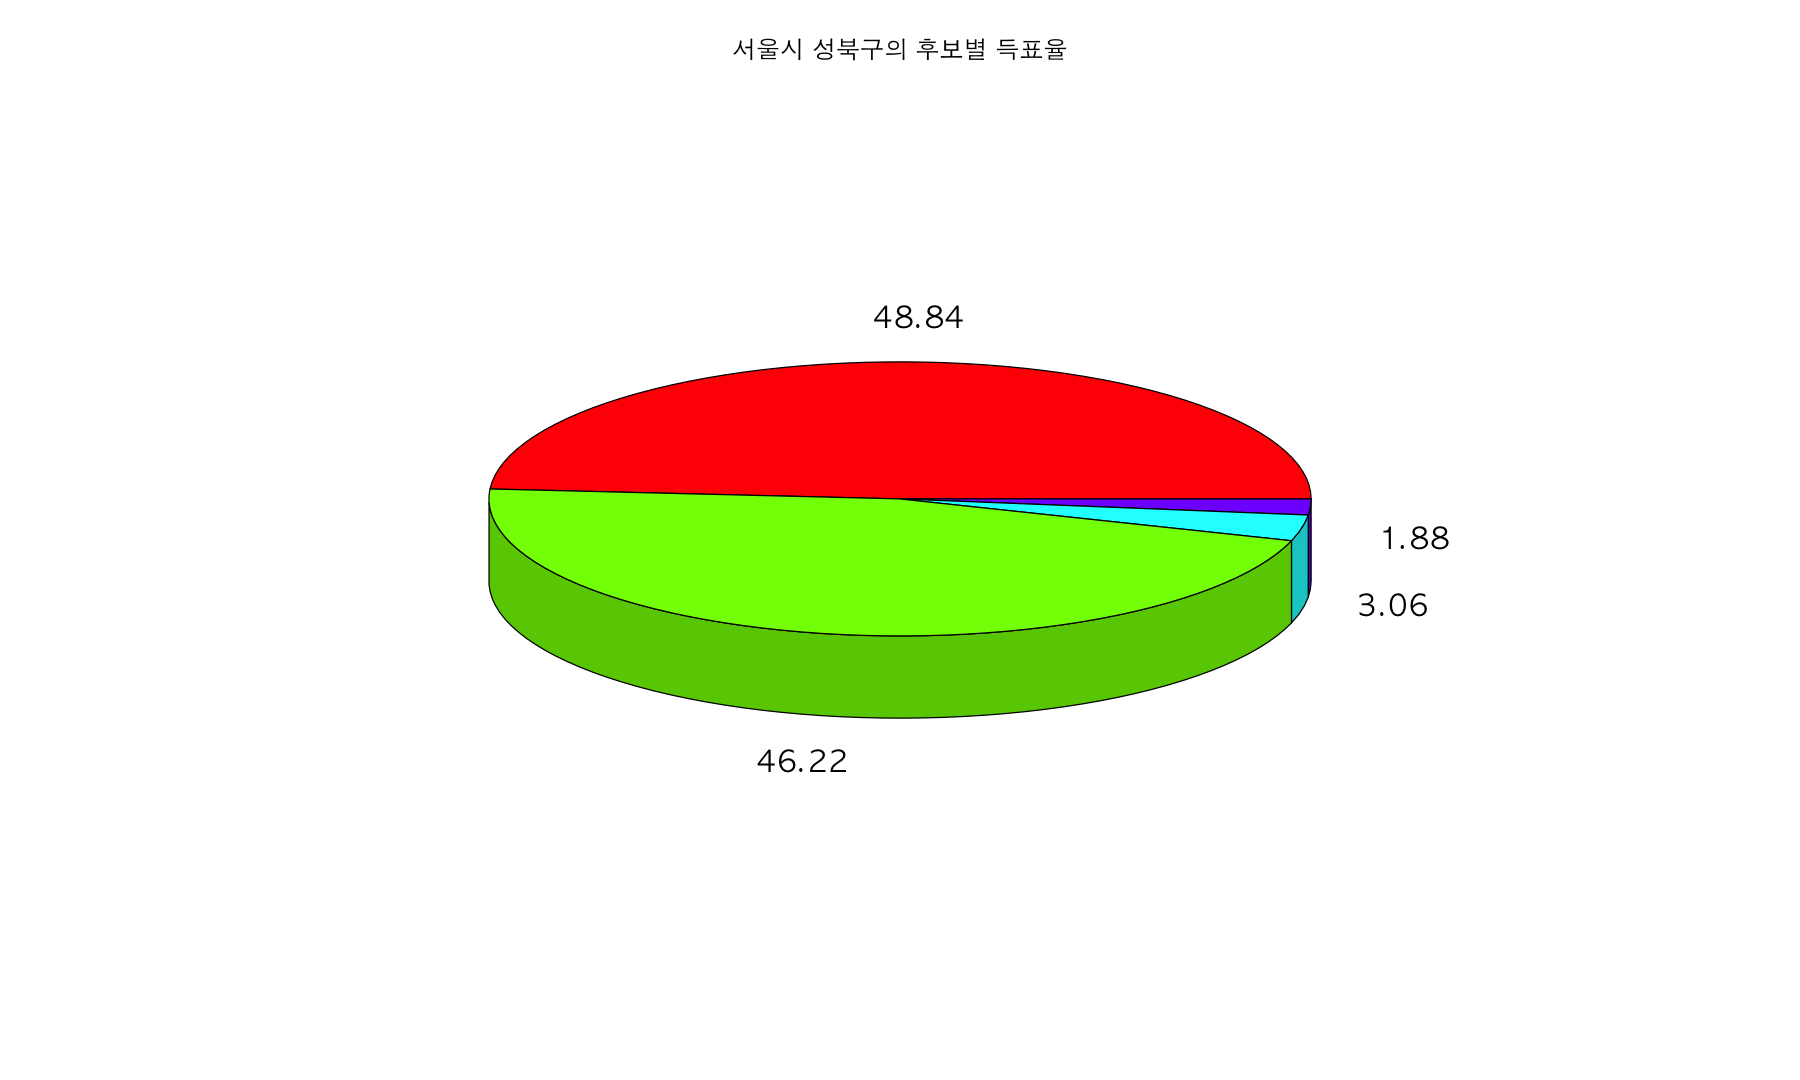

In [ ]:
par(family = 'AppleGothic',bg= 'white')
pie3D(aaa, 
      main = '서울시 성북구의 후보별 득표율',
      labels = table1
      
        


)

In [ ]:
pob_윤석열 <- subset(election, 시군구 =='성북구')
pob_윤석열

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionsum,electionratio
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
8,서울특별시,성북구,375880,292187,142702,135044,8952,286698,98.12141


In [ ]:
ratio <-  as.numeric(c(pob_윤석열[,5:7],
pob_윤석열[,4] - sum(pob_윤석열[,5:7]))) / pob_윤석열[,4] * 100

ratio


[1] 48.839271 46.218346  3.063791  1.878591

In [ ]:
paste(c("이재명","윤석열","심상정",'기타'), " \n",round(ratio),2 ,'%')

[1] "이재명  \n 49 2 %" "윤석열  \n 46 2 %" "심상정  \n 3 2 %" 
[4] "기타  \n 2 2 %"

## 투표수가 가장 많은 4지역(광역시도)의 각 후보별 득표수를 막대그래프로 그리기

In [ ]:
head(election)

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionsum,electionratio
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80183
2,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19055
3,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30076
4,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18292
5,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.98531
6,서울특별시,동대문구,300928,232106,108171,112890,6416,227477,98.00565


In [ ]:
election$`투표수`

[1] 100629  84998 152068 197240 235471 232106 260862 292187 199448 216036
 [11] 349297 317971 210460 256218 301379 390247 272920 157035 263581 271510
 [21] 340773 277878 354778 453536 313203  27408  69786  59326  71696 233474
 [31] 179768 173557 189125 259616 106148 196600 155206  84488 139351 118017
 [41] 136658  51325 232992 113904  97962 294832 285537 368662 166298  90125
 [51]  40918 253347 250104 329653 316024 193864 346084  48473  14912  73877
 [61] 202633 148854 295658 264470 142804 151200 304873 231027 115404 143171
 [71] 209589  98491 138319 145891 231832 183882 235055 119627 239154 161006
 [81] 142368 335434 295029 162812 216629 532995 198669 338768 145562  57532
 [91] 222254 192948 323033 197004 197311  54194 113105 127688 460518 135108
[101] 542027 317197 183089 208858 297278  72566 137512 162420 250764 289459
[111] 117380 302170  95968  28904  83065  42512 186646 226239 141724  57515
[121]  43642  27039  24898  52516  19218  19716  21836  46697  32625  26925
[131]  29353  16494  14529  27846 122198 124726 163683 117836 135848  87091
[141]  20193  31795  22717  34242  51932  27419  22653 238154 157433  68872
[151]  65715 192927 108990  42028  33699  73512  27992 100874  43975  35136
[161]  62416  21588  51349 231447 215995 177339 189310  75092  56509  58026
[171]  63481  18855  17429  16230  20057  19879  38707  36856 145187 189617
[181] 192412  81076 100876  34632  31666  20717  19132  47171  29323  45152
[191]  27048  24960  35300  48441  21744  37333  61552  36321  23295  29213
[201] 183046 152184   6653 173759  95575 106950 253211  70769  70942  68459
[211]  49720  39128 176406  30953  22270  32009  71492  18239  39245  18789
[221]  12337  25897  22707  33544 143063 170073 120928 125233 119212 228238
[231]  80080  34327  71772 328521  70249 145481  19089  41791  41401 220501
[241]  32089  30297  26955  24913  41399  31270 296826 112823

In [ ]:
Data <- aggregate(투표수 ~ 광역시도, election, sum)
Data

광역시도,투표수
<chr>,<int>
강원도,1015458
경기도,8518854
경상남도,2146882
경상북도,1774284
광주광역시,985492
대구광역시,1611512
대전광역시,945308
부산광역시,2200224
서울특별시,6501831


In [ ]:

sortData <- arrange(Data, desc(투표수))
sortData

광역시도,투표수
<chr>,<int>
경기도,8518854
서울특별시,6501831
부산광역시,2200224
경상남도,2146882
인천광역시,1883504
경상북도,1774284
대구광역시,1611512
충청남도,1324660
전라남도,1282168


In [ ]:
Fdata <- head(sortData,4)
Fdata

chart <- Fdata[-c(2)]
chart
# 
# 합집합 사용가능?
# 이,윤,심 데이터를 각각 모아서 머지가 가능할까?


,광역시도,투표수
,<chr>,<int>
1,경기도,8518854
2,서울특별시,6501831
3,부산광역시,2200224
4,경상남도,2146882


,광역시도
,<chr>
1,경기도
2,서울특별시
3,부산광역시
4,경상남도


In [ ]:
election[c(5,6,7)]

con <- subset(election[c(5,6,7)], election$`광역시도` == '경기도' )

apply(con[c(1,2,3)],2,sum )

이재명,윤석열,심상정
<int>,<int>,<int>
46130,49172,3115
38244,42906,2310
60063,85047,4374
84411,103880,5365
109922,113733,7072
108171,112890,6416
130381,118201,6899
142702,135044,8952
103333,86540,5245


이재명  윤석열  심상정 
4297931 3859666  201113

In [ ]:
# 투표수가 가장 많은 지역 뽑기 
head(elec_sum)
#                                          행렬의 첫번째 줄의 1부터 4번까지
top4Area <- arrange(elec_sum, desc(투표수))[1:4,1]
top4Area

,광역시도,투표수
,<chr>,<int>
1,강원도,1015458
2,경기도,8518854
3,경상남도,2146882
4,경상북도,1774284
5,광주광역시,985492
6,대구광역시,1611512


[1] "경기도"     "서울특별시" "부산광역시" "경상남도"

In [ ]:
# 광역시별 후보 득표수 합계 구하기

elec_윤석열 <- aggregate(윤석열 ~ 광역시도, election, sum)
elec_이재명 <- aggregate(이재명 ~ 광역시도, election, sum)
elec_심상정 <- aggregate(심상정 ~ 광역시도, election, sum)
elec_윤석열
elec_이재명
elec_심상정

광역시도,윤석열
<chr>,<int>
강원도,544980
경기도,3859666
경상남도,1237346
경상북도,1278922
광주광역시,124511
대구광역시,1199888
대전광역시,464060
부산광역시,1270072
서울특별시,3255747


광역시도,이재명
<chr>,<int>
강원도,419644
경기도,4297931
경상남도,794130
경상북도,418371
광주광역시,830058
대구광역시,345045
대전광역시,434950
부산광역시,831896
서울특별시,2944981


광역시도,심상정
<chr>,<int>
강원도,25031
경기도,201113
경상남도,52591
경상북도,33123
광주광역시,14865
대구광역시,31131
대전광역시,25445
부산광역시,47541
서울특별시,180324


In [ ]:
# 투표수가 1순위인 지역의 득표수 구하기
top4_1 <- 
c(subset(elec_윤석열, 광역시도 == top4Area[1])[1,2],
subset(elec_이재명, 광역시도 == top4Area[1])[1,2],
subset(elec_심상정, 광역시도 == top4Area[1])[1,2])
top4_1

[1] 3859666 4297931  201113

In [ ]:
# 투표수가 2순위인 지역의 득표수 구하기
top4_2 <- 
c(subset(elec_윤석열, 광역시도 == top4Area[2])[1,2],
subset(elec_이재명, 광역시도 == top4Area[2])[1,2],
subset(elec_심상정, 광역시도 == top4Area[2])[1,2])
top4_2

[1] 3255747 2944981  180324

In [ ]:
# 투표수가 3순위인 지역의 득표수 구하기
top4_3 <- 
c(subset(elec_윤석열, 광역시도 == top4Area[3])[1,2],
subset(elec_이재명, 광역시도 == top4Area[3])[1,2],
subset(elec_심상정, 광역시도 == top4Area[3])[1,2])
top4_3

[1] 1270072  831896   47541

In [ ]:
# 투표수가 1순위인 지역의 득표수 구하기
top4_4 <- 
c(subset(elec_윤석열, 광역시도 == top4Area[4])[1,2],
subset(elec_이재명, 광역시도 == top4Area[4])[1,2],
subset(elec_심상정, 광역시도 == top4Area[4])[1,2])
top4_4

[1] 1237346  794130   52591

In [ ]:
top4 <- cbind(top4_1,top4_2,top4_3,top4_4)
top4


top4_1,top4_2,top4_3,top4_4
1237346,3255747,1270072,1237346
794130,2944981,831896,794130
52591,180324,47541,52591


In [ ]:
colnames(top4) <- top4Area
rownames(top4) <- c("이재명","윤석열","심상정")
top4

,경기도,서울특별시,부산광역시,경상남도
이재명,1237346,3255747,1270072,1237346
윤석열,794130,2944981,831896,794130
심상정,52591,180324,47541,52591


In [ ]:
# 반복 문 사용해서 하기
top4 <- c()

In [ ]:
for(i in 1:length(top4Area)) {
 topTemp <-   c(subset(elec_윤석열, 광역시도 == top4Area[i])[1,2],
                subset(elec_이재명, 광역시도 == top4Area[i])[1,2],
                subset(elec_심상정, 광역시도 == top4Area[i])[1,2])
top4 = cbind(top4, topTemp)
}
top4

topTemp,topTemp,topTemp,topTemp,topTemp,topTemp,topTemp,topTemp
3859666,3255747,1270072,1237346,3859666,3255747,1270072,1237346
4297931,2944981,831896,794130,4297931,2944981,831896,794130
201113,180324,47541,52591,201113,180324,47541,52591


In [ ]:
# aggregate 사용하지 않고 계산 
apply(subset(election, 광역시도 == top4Area[1])[5:7], 2, sum)

이재명  윤석열  심상정 
4297931 3859666  201113

In [ ]:
top4 <- c()

In [ ]:
for(i in 1:length(top4Area)) {
  topTemp  <- apply(subset(election, 광역시도 == top4Area[i])[5:7], 2, sum)
  top4 <- cbind(top4,topTemp)
}
top4
# cbind , rbind 로 만들면 matrix 타입으로 생성 

,topTemp,topTemp,topTemp,topTemp
이재명,4297931,2944981,831896,794130
윤석열,3859666,3255747,1270072,1237346
심상정,201113,180324,47541,52591


In [ ]:
colnames(top4) <- top4Area
top4

,경기도,서울특별시,부산광역시,경상남도
이재명,4297931,2944981,831896,794130
윤석열,3859666,3255747,1270072,1237346
심상정,201113,180324,47541,52591


In [ ]:
class(top4)

[1] "matrix" "array"

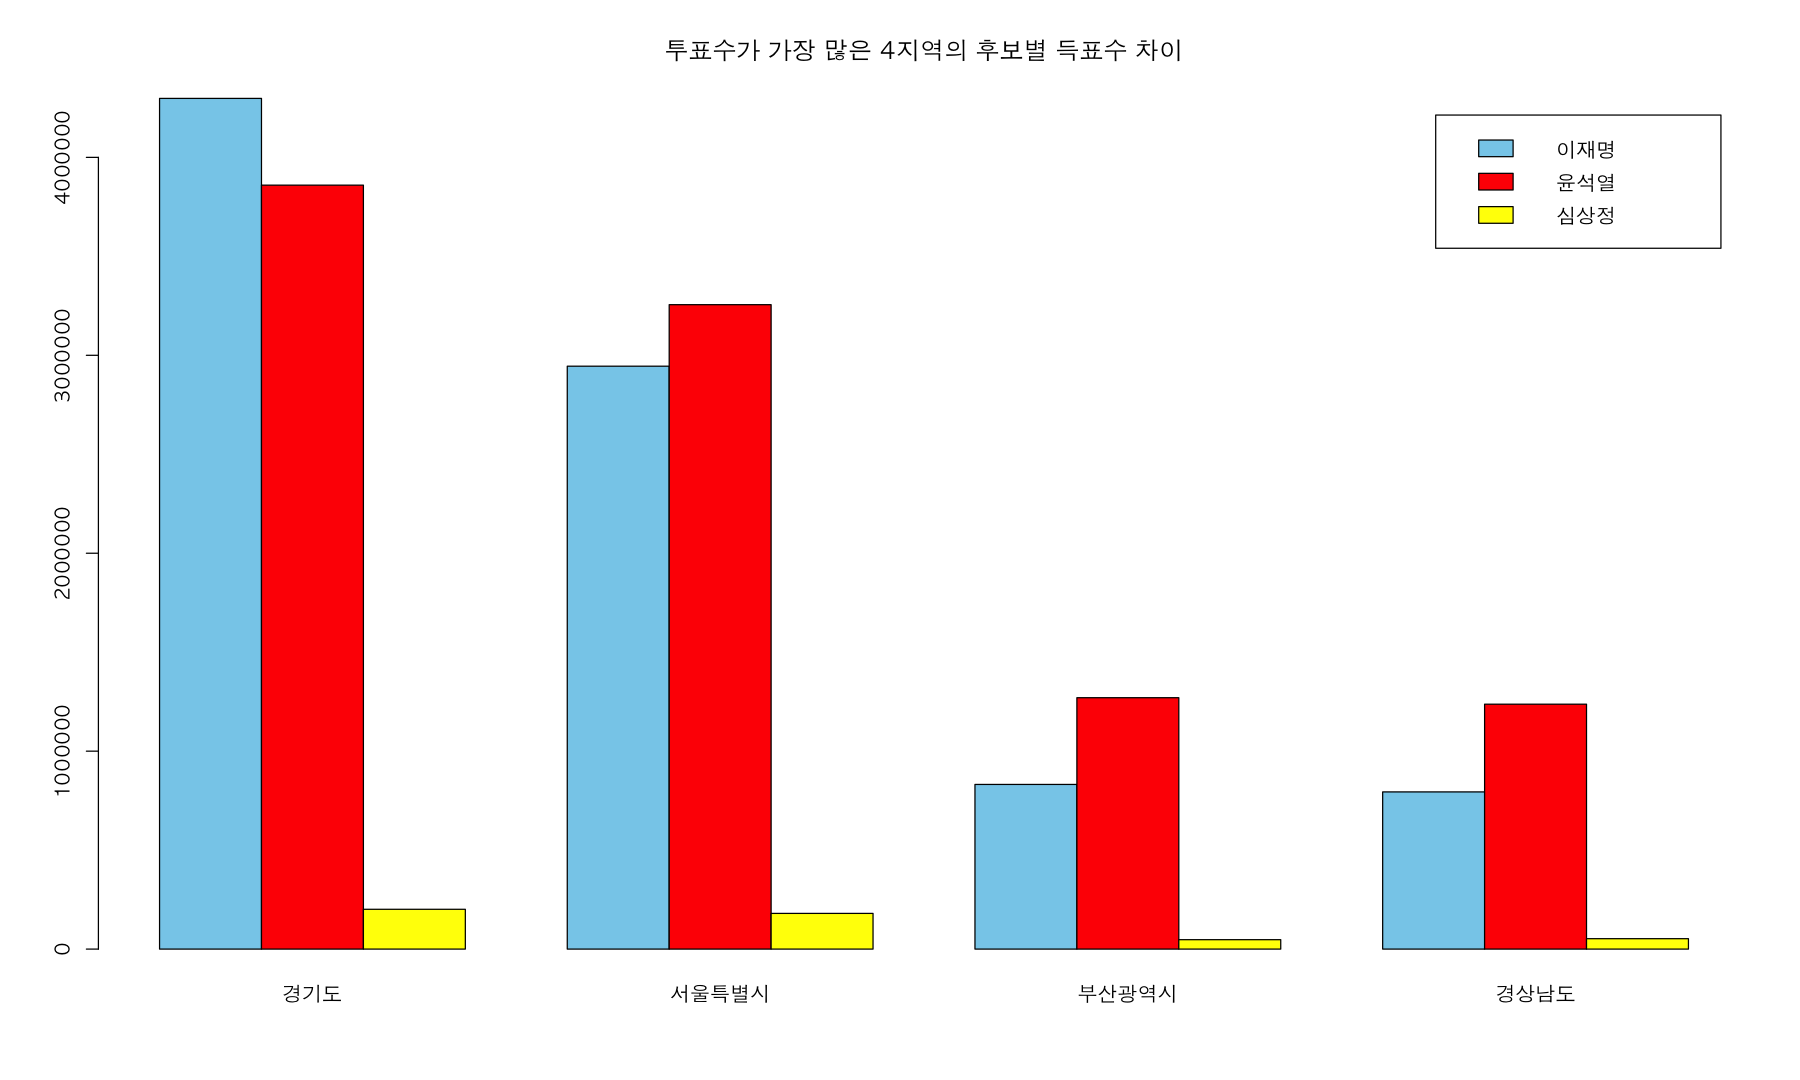

In [ ]:
options(scipen = 100)
par(family = "AppleGothic", bg = 'white') 
barplot(top4,
        beside = T,
        ylimn = c(0,5000000),
        main = "투표수가 가장 많은 4지역의 후보별 득표수 차이",
        col = c('sky blue', 'red', 'yellow'),
        legend.text = T,

)

### 투표수가 높은 시군구의 후보별 득표수

In [69]:
# 데이터 조회
head(election)
# 정렬을 한 데이터를 후보만 조회
top5 <- head(arrange(election, desc(투표수)),5)[c(5:7)]
top5
class(top5)
# 확인용
head(arrange(election, desc(투표수)),5)[c(1:2,5:7)]

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionsum,electionratio
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80183
2,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19055
3,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30076
4,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18292
5,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.98531
6,서울특별시,동대문구,300928,232106,108171,112890,6416,227477,98.00565


,이재명,윤석열,심상정
,<int>,<int>,<int>
1,283324,236055,12955
2,285227,224331,13249
3,239179,203075,10089
4,180490,255166,10652
5,190000,181510,11100


[1] "data.frame"

,광역시도,시군구,이재명,윤석열,심상정
,<chr>,<chr>,<int>,<int>,<int>
1,경기도,화성시,283324,236055,12955
2,경기도,부천시,285227,224331,13249
3,경기도,남양주시,239179,203075,10089
4,서울특별시,송파구,180490,255166,10652
5,서울특별시,강서구,190000,181510,11100


In [64]:
# 내가 필요한 데이터 모양은 각 지역에 해당하는 후보 3명의 데이터가 세로로 나와야 한다
top5Data  <- t(top5)
top5Data
# 뒤집은 상태로 컬럼이름 1:5 를 내가 원하는 이름으로 바꾼다
colnames(top5Data) <- c('경기도 화성시','경기도 부천시','경기도 남양주시','서울특별시 송파구','서울특별시 강서구')
top5Data


,1,2,3,4,5
이재명,283324,285227,239179,180490,190000
윤석열,236055,224331,203075,255166,181510
심상정,12955,13249,10089,10652,11100


,경기도 화성시,경기도 부천시,경기도 남양주시,서울특별시 송파구,서울특별시 강서구
이재명,283324,285227,239179,180490,190000
윤석열,236055,224331,203075,255166,181510
심상정,12955,13249,10089,10652,11100


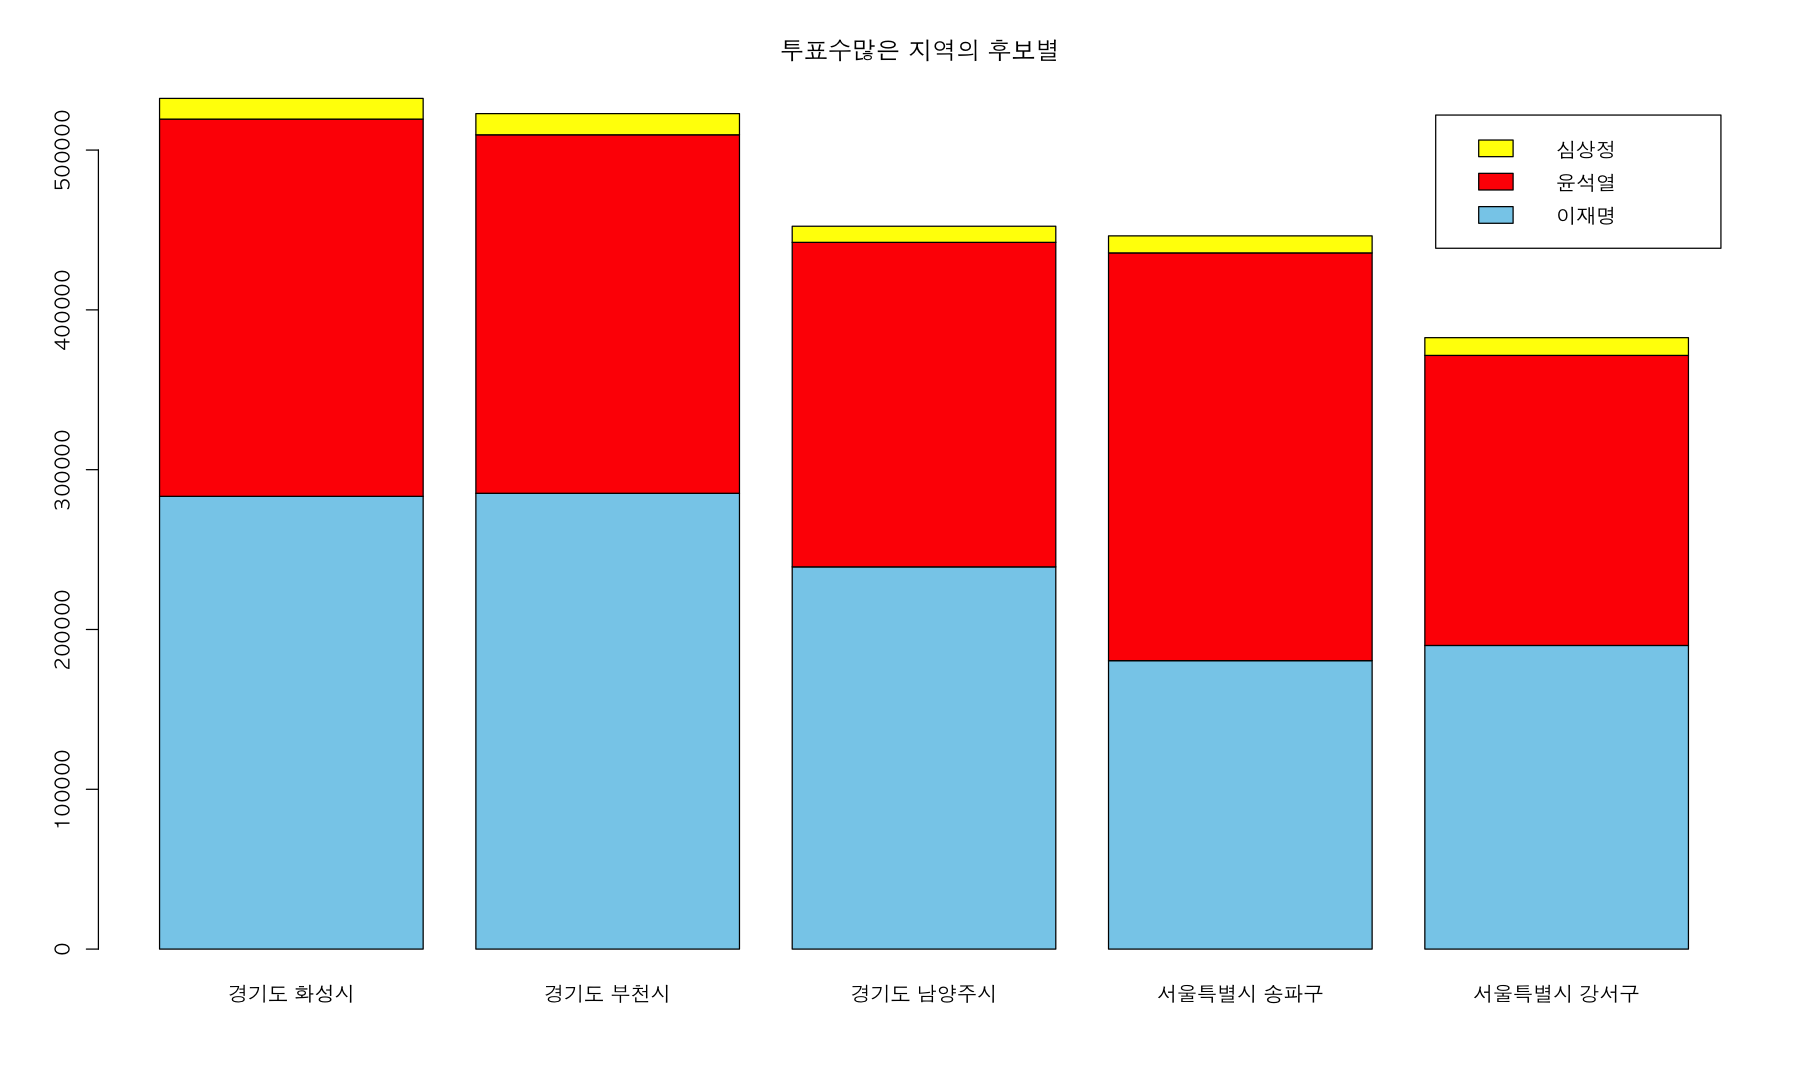

In [71]:
options(scipen = 100)
par(family = "AppleGothic", bg = 'white') 
barplot(top5Data,
          ylimn = c(0,10000000),
        main = "투표수많은 지역의 후보별 ",
        col = c('sky blue', 'red', 'yellow'),
        legend.text = T,
        
        
)

# 강사님 방법


In [90]:
elec_top5 <- t(head(arrange(election, desc(투표수)),5)[5:7])
elec_top5
elec <- head(arrange(election, desc(투표수)),5)
colnames(elec_top5) <- paste(elec$광역시도, elec$시군구)
elec_top5

,1,2,3,4,5
이재명,283324,285227,239179,180490,190000
윤석열,236055,224331,203075,255166,181510
심상정,12955,13249,10089,10652,11100


,경기도 화성시,경기도 부천시,경기도 남양주시,서울특별시 송파구,서울특별시 강서구
이재명,283324,285227,239179,180490,190000
윤석열,236055,224331,203075,255166,181510
심상정,12955,13249,10089,10652,11100
